# Normalising data to store them in MS SQL Server

For efficient database storage in MS SQL Server, we need to normalise the data to reduce redundancy and composite values. I will normalise the data with star schema. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cleanData/main_data.csv')
data.head()

,EmployeeID,First_Name,Surname,StreetAddress,City,StateFull,ZipCode,Country,CountryFull,Age,...,level,Active Status,Job_Profile,Compensation,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD)
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,New York,13212,US,United States,37.0,...,CSuite,1,JP_1000,500000.0,2009,0,172.029324,14.139396,NY,500000.0
1,100002,David,Rickards,4265 Graystone Lakes,Macon,Georgia,31206,US,United States,52.0,...,Manager,1,JP_1001,100000.0,2009,0,172.029324,14.139396,GA,70000.0
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,New Jersey,07087,US,United States,34.0,...,Individual Contributor,0,JP_1027,75000.0,2009,2013,49.300000,4.052055,NJ,77000.0
3,100004,Justin,Edgin,1262 Limer Street,Rome,Georgia,30165,US,United States,27.0,...,CSuite,0,JP_1041,400000.0,2009,2013,52.566667,4.320548,GA,400000.0
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,California,92705,US,United States,51.0,...,Manager,0,JP_1018,NaN,2009,2011,18.200000,1.495890,CA,51000.0


In [3]:
data.columns

Index(['EmployeeID', 'First_Name', 'Surname', 'StreetAddress', 'City',
       'StateFull', 'ZipCode', 'Country', 'CountryFull', 'Age', 'Office',
       'Start_Date', 'Termination_Date', 'Office_Type', 'Department',
       'Currency', 'Bonus_pct', 'Job_title', 'DOB', 'level', 'Active Status',
       'Job_Profile', 'Compensation', 'start_year', 'termination_year',
       'tenure_months', 'tenure_years', 'State_code', 'Salary(USD)'],
      dtype='object')

## Finding dependency

### 1. Company/Office details

First, we are going to identify dependency with office.

In [4]:
company_details = pd.read_csv('cleanData/company_details.csv')
company_details.head()

,Office,Currency
0,NYC,USD
1,Boulder,USD
2,Oslo,NOK
3,SanJose,USD
4,London,GBP


In [5]:
data.head().loc[:,'Office':]

,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Active Status,Job_Profile,Compensation,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD)
0,NYC,2009-05-04,NaN,Corporate,Corporate,USD,1.00,CEO,1986-01-05,CSuite,1,JP_1000,500000.0,2009,0,172.029324,14.139396,NY,500000.0
1,NYC,2009-05-04,NaN,Corporate,Corporate,USD,0.20,HR Manager,1971-07-13,Manager,1,JP_1001,100000.0,2009,0,172.029324,14.139396,GA,70000.0
2,NYC,2009-05-18,2013-06-05 00:00:00.000000,Corporate,Marketing,USD,0.15,Graphic Designer,1989-01-25,Individual Contributor,0,JP_1027,75000.0,2009,2013,49.300000,4.052055,NJ,77000.0
3,Boulder,2009-06-22,2013-10-16 00:00:00.000000,Corporate,Technology,USD,0.50,CTO,1996-05-01,CSuite,0,JP_1041,400000.0,2009,2013,52.566667,4.320548,GA,400000.0
4,NYC,2009-07-13,2011-01-10 00:00:00.000000,Corporate,Customer Service,USD,0.15,Associate Account Manager,1972-05-05,Manager,0,JP_1018,NaN,2009,2011,18.200000,1.495890,CA,51000.0


In [6]:
data.loc[(data['Office_Type']=='Technology'),'Office':'Job_Profile']

,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Active Status,Job_Profile
48,Boulder,2010-01-25,2010-10-21 00:00:00.000000,Technology,Technology,USD,0.15,Software Engineer,1974-11-11,Individual Contributor,0,JP_1043
49,Boulder,2010-02-01,2014-05-14 00:00:00.000000,Technology,Technology,USD,0.15,Software Engineer,1976-05-04,Individual Contributor,0,JP_1043
53,Boulder,2010-02-15,2014-04-24 00:00:00.000000,Technology,Technology,USD,0.20,"Director, Engineering",1983-09-16,Director,0,JP_1045
54,Oslo,2010-02-22,2019-08-19 00:00:00.000000,Technology,Technology,NOK,0.15,Software Engineer,1982-02-14,Individual Contributor,0,JP_1043
55,Boulder,2010-03-08,2011-07-15 00:00:00.000000,Technology,Technology,USD,0.15,Software Engineer,1987-03-23,Individual Contributor,0,JP_1043
...,...,...,...,...,...,...,...,...,...,...,...,...
4957,Boulder,2021-11-22,NaN,Technology,Technology,USD,0.15,Software Engineer,1977-08-05,Individual Contributor,1,JP_1043
4961,NYC,2021-09-13,NaN,Technology,Corporate,USD,0.50,Chief Human Resources Officer,1957-02-05,CSuite,1,JP_1055
4962,SanFran,2021-06-21,NaN,Technology,Sales,USD,0.15,Sales Team Lead,1974-12-22,Senior,1,JP_1039
4964,Boulder,2021-01-25,NaN,Technology,Technology,USD,0.15,Software Engineer,1975-07-05,Individual Contributor,1,JP_1043


There seems to be a partial dependency on office and office type. We are going to normalise that.

In [7]:
d = data[['Office','Office_Type']]
company_details=company_details.merge(d, on='Office', how='left').drop_duplicates()
company_details

,Office,Currency,Office_Type
0,NYC,USD,Corporate
1664,NYC,USD,Technology
1796,Boulder,USD,Corporate
1797,Boulder,USD,Technology
3429,Oslo,NOK,Technology
3579,SanJose,USD,Corporate
4434,SanJose,USD,Technology
4496,London,GBP,Corporate
4746,Tokyo,JPY,Corporate
4796,HongKong,HKD,Technology


Creating ID for office table

In [8]:
company_details['Office_id']=[i for i in range(company_details.shape[0])]
company_details

,Office,Currency,Office_Type,Office_id
0,NYC,USD,Corporate,0
1664,NYC,USD,Technology,1
1796,Boulder,USD,Corporate,2
1797,Boulder,USD,Technology,3
3429,Oslo,NOK,Technology,4
3579,SanJose,USD,Corporate,5
4434,SanJose,USD,Technology,6
4496,London,GBP,Corporate,7
4746,Tokyo,JPY,Corporate,8
4796,HongKong,HKD,Technology,9


Adding `office_id` into main data

In [9]:
data = data.merge(company_details, on=['Office','Office_Type', 'Currency'], how='left')
data.head(10)

,EmployeeID,First_Name,Surname,StreetAddress,City,StateFull,ZipCode,Country,CountryFull,Age,...,Active Status,Job_Profile,Compensation,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD),Office_id
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,New York,13212,US,United States,37.0,...,1,JP_1000,500000.0,2009,0,172.029324,14.139396,NY,500000.0,0
1,100002,David,Rickards,4265 Graystone Lakes,Macon,Georgia,31206,US,United States,52.0,...,1,JP_1001,100000.0,2009,0,172.029324,14.139396,GA,70000.0,0
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,New Jersey,07087,US,United States,34.0,...,0,JP_1027,75000.0,2009,2013,49.300000,4.052055,NJ,77000.0,0
3,100004,Justin,Edgin,1262 Limer Street,Rome,Georgia,30165,US,United States,27.0,...,0,JP_1041,400000.0,2009,2013,52.566667,4.320548,GA,400000.0,2
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,California,92705,US,United States,51.0,...,0,JP_1018,NaN,2009,2011,18.200000,1.495890,CA,51000.0,0
5,100006,Nelson,Grillo,3645 Coolidge Street,North Custer,Montana,59024,US,United States,30.0,...,0,JP_1034,85000.0,2009,2021,147.866667,12.153425,MT,76000.0,0
6,100007,Kevin,Rainey,977 Black Oak Hollow Road,Santa Clara,California,95054,US,United States,33.0,...,0,JP_1020,70000.0,2009,2011,19.033333,1.564384,CA,56000.0,0
7,100008,Melanie,Hurst,2751 Holden Street,San Diego,California,92103,US,United States,40.0,...,0,JP_1034,85000.0,2009,2012,32.266667,2.652055,CA,72000.0,0
8,100009,Greg,Boon,4791 Loving Acres Road,Grapevine,Texas,76051,US,United States,31.0,...,1,JP_1035,175000.0,2009,0,169.229324,13.909260,TX,74000.0,0
9,100010,Frank,Stockdale,1413 Roy Alley,Centennial,Colorado,80111,US,United States,34.0,...,0,JP_1020,70000.0,2009,2014,58.366667,4.797260,CO,52000.0,0


Dropping dependent columns

In [10]:
data.drop(['Office','Office_Type', 'Currency'], axis=1, inplace=True)
data.columns

Index(['EmployeeID', 'First_Name', 'Surname', 'StreetAddress', 'City',
       'StateFull', 'ZipCode', 'Country', 'CountryFull', 'Age', 'Start_Date',
       'Termination_Date', 'Department', 'Bonus_pct', 'Job_title', 'DOB',
       'level', 'Active Status', 'Job_Profile', 'Compensation', 'start_year',
       'termination_year', 'tenure_months', 'tenure_years', 'State_code',
       'Salary(USD)', 'Office_id'],
      dtype='object')

In [11]:
company_details.reset_index(drop=True, inplace=True)
company_details

,Office,Currency,Office_Type,Office_id
0,NYC,USD,Corporate,0
1,NYC,USD,Technology,1
2,Boulder,USD,Corporate,2
3,Boulder,USD,Technology,3
4,Oslo,NOK,Technology,4
5,SanJose,USD,Corporate,5
6,SanJose,USD,Technology,6
7,London,GBP,Corporate,7
8,Tokyo,JPY,Corporate,8
9,HongKong,HKD,Technology,9


### 2. Job Details table

In [12]:
job_details = pd.read_csv('cleanData/job_details.csv')
job_details.head()

,Department,Job_title,level,Bonus_pct,Job_Profile,Compensation
0,Corporate,CEO,CSuite,1.00,JP_1000,500000.0
1,Corporate,HR Manager,Manager,0.20,JP_1001,100000.0
2,Corporate,HR Manager,Individual Contributor,0.20,JP_1002,NaN
3,Corporate,AR Specialist,Individual Contributor,0.15,JP_1003,65000.0
4,Corporate,AP Specialist,Individual Contributor,0.15,JP_1004,65000.0


In [13]:
data.head().iloc[:,:13]

,EmployeeID,First_Name,Surname,StreetAddress,City,StateFull,ZipCode,Country,CountryFull,Age,Start_Date,Termination_Date,Department
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,New York,13212,US,United States,37.0,2009-05-04,NaN,Corporate
1,100002,David,Rickards,4265 Graystone Lakes,Macon,Georgia,31206,US,United States,52.0,2009-05-04,NaN,Corporate
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,New Jersey,07087,US,United States,34.0,2009-05-18,2013-06-05 00:00:00.000000,Marketing
3,100004,Justin,Edgin,1262 Limer Street,Rome,Georgia,30165,US,United States,27.0,2009-06-22,2013-10-16 00:00:00.000000,Technology
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,California,92705,US,United States,51.0,2009-07-13,2011-01-10 00:00:00.000000,Customer Service


In [14]:
data.head().iloc[:,13:]

,Bonus_pct,Job_title,DOB,level,Active Status,Job_Profile,Compensation,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD),Office_id
0,1.00,CEO,1986-01-05,CSuite,1,JP_1000,500000.0,2009,0,172.029324,14.139396,NY,500000.0,0
1,0.20,HR Manager,1971-07-13,Manager,1,JP_1001,100000.0,2009,0,172.029324,14.139396,GA,70000.0,0
2,0.15,Graphic Designer,1989-01-25,Individual Contributor,0,JP_1027,75000.0,2009,2013,49.300000,4.052055,NJ,77000.0,0
3,0.50,CTO,1996-05-01,CSuite,0,JP_1041,400000.0,2009,2013,52.566667,4.320548,GA,400000.0,2
4,0.15,Associate Account Manager,1972-05-05,Manager,0,JP_1018,NaN,2009,2011,18.200000,1.495890,CA,51000.0,0


Identifier for job_details is `Job_Profile`, so it is already normalised. Dropping columns that existed in job_details table in main data

In [15]:
col_to_drop = list(job_details.columns)
col_to_drop.remove('Job_Profile')
col_to_drop

['Department', 'Job_title', 'level', 'Bonus_pct', 'Compensation']

In [16]:
data.drop(col_to_drop, axis=1, inplace=True)
data.head()

,EmployeeID,First_Name,Surname,StreetAddress,City,StateFull,ZipCode,Country,CountryFull,Age,...,DOB,Active Status,Job_Profile,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD),Office_id
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,New York,13212,US,United States,37.0,...,1986-01-05,1,JP_1000,2009,0,172.029324,14.139396,NY,500000.0,0
1,100002,David,Rickards,4265 Graystone Lakes,Macon,Georgia,31206,US,United States,52.0,...,1971-07-13,1,JP_1001,2009,0,172.029324,14.139396,GA,70000.0,0
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,New Jersey,07087,US,United States,34.0,...,1989-01-25,0,JP_1027,2009,2013,49.300000,4.052055,NJ,77000.0,0
3,100004,Justin,Edgin,1262 Limer Street,Rome,Georgia,30165,US,United States,27.0,...,1996-05-01,0,JP_1041,2009,2013,52.566667,4.320548,GA,400000.0,2
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,California,92705,US,United States,51.0,...,1972-05-05,0,JP_1018,2009,2011,18.200000,1.495890,CA,51000.0,0


### 3. Normalising state and country

Normalising into state table

In [17]:
statedf = data[['StateFull','State_code']].drop_duplicates().reset_index(drop=True)
print(statedf.shape)
statedf

(52, 2)


,StateFull,State_code
0,New York,NY
1,Georgia,GA
2,New Jersey,NJ
3,California,CA
4,Montana,MT
5,Texas,TX
6,Colorado,CO
7,Oklahoma,OK
8,Florida,FL
9,North Dakota,ND


In [18]:
statedf.dropna(inplace=True)

In [19]:
# Drop StateFull in main data
data.drop('StateFull', axis=1, inplace=True)
data.head()

,EmployeeID,First_Name,Surname,StreetAddress,City,ZipCode,Country,CountryFull,Age,Start_Date,...,DOB,Active Status,Job_Profile,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD),Office_id
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,13212,US,United States,37.0,2009-05-04,...,1986-01-05,1,JP_1000,2009,0,172.029324,14.139396,NY,500000.0,0
1,100002,David,Rickards,4265 Graystone Lakes,Macon,31206,US,United States,52.0,2009-05-04,...,1971-07-13,1,JP_1001,2009,0,172.029324,14.139396,GA,70000.0,0
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,07087,US,United States,34.0,2009-05-18,...,1989-01-25,0,JP_1027,2009,2013,49.300000,4.052055,NJ,77000.0,0
3,100004,Justin,Edgin,1262 Limer Street,Rome,30165,US,United States,27.0,2009-06-22,...,1996-05-01,0,JP_1041,2009,2013,52.566667,4.320548,GA,400000.0,2
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,92705,US,United States,51.0,2009-07-13,...,1972-05-05,0,JP_1018,2009,2011,18.200000,1.495890,CA,51000.0,0


Normalising into country table

In [20]:
set(data['Country']) # Check how many countries we have

{'GB', 'HK', 'JP', 'NO', 'US'}

In [21]:
set(data['CountryFull'])

{'Hong Kong', 'Japan', 'Norway', 'United Kingdom', 'United States'}

In [22]:
country_df = data[['Country','CountryFull']].drop_duplicates().reset_index(drop=True)
country_df

,Country,CountryFull
0,US,United States
1,NO,Norway
2,GB,United Kingdom
3,JP,Japan
4,HK,Hong Kong


In [23]:
# Dropping CountryFull in main data
data.drop('CountryFull', axis=1, inplace=True)
data.head()

,EmployeeID,First_Name,Surname,StreetAddress,City,ZipCode,Country,Age,Start_Date,Termination_Date,DOB,Active Status,Job_Profile,start_year,termination_year,tenure_months,tenure_years,State_code,Salary(USD),Office_id
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,13212,US,37.0,2009-05-04,NaN,1986-01-05,1,JP_1000,2009,0,172.029324,14.139396,NY,500000.0,0
1,100002,David,Rickards,4265 Graystone Lakes,Macon,31206,US,52.0,2009-05-04,NaN,1971-07-13,1,JP_1001,2009,0,172.029324,14.139396,GA,70000.0,0
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,07087,US,34.0,2009-05-18,2013-06-05 00:00:00.000000,1989-01-25,0,JP_1027,2009,2013,49.300000,4.052055,NJ,77000.0,0
3,100004,Justin,Edgin,1262 Limer Street,Rome,30165,US,27.0,2009-06-22,2013-10-16 00:00:00.000000,1996-05-01,0,JP_1041,2009,2013,52.566667,4.320548,GA,400000.0,2
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,92705,US,51.0,2009-07-13,2011-01-10 00:00:00.000000,1972-05-05,0,JP_1018,2009,2011,18.200000,1.495890,CA,51000.0,0


In [24]:
data.rename(columns={'Country':'Country_code'}, inplace=True)
country_df.rename(columns={'Country':'Country_code'}, inplace=True)

### 4. Employee Demographics table

In [25]:
emp_demo = pd.read_csv('cleanData/employee_details.csv')
emp_demo.head()

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
0,100001,female,female,White,0,0,Undergraduate,Heterosexual
1,100002,male,male,White,0,1,Undergraduate,Heterosexual
2,100003,female,female,Asian,0,0,Undergraduate,Heterosexual
3,100004,male,male,White,0,0,Undergraduate,Heterosexual
4,100005,male,male,Hispanic or Latino,0,0,Undergraduate,Missing


We are going to create employee information table instead of appending into emp_details table. I will add `Age` and `DOB` into emp_details. The info table will contain the street address, city, zipcode, country_code, start/termination date, tenure, and active status. Meanwhile the above table will be the employee demographics table.

In [26]:
extra_data = data[['EmployeeID','Age','DOB']]
extra_data.head()

,EmployeeID,Age,DOB
0,100001,37.0,1986-01-05
1,100002,52.0,1971-07-13
2,100003,34.0,1989-01-25
3,100004,27.0,1996-05-01
4,100005,51.0,1972-05-05


In [27]:
emp_demo=emp_demo.merge(extra_data, on='EmployeeID', how='left')
emp_demo.head()

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation,Age,DOB
0,100001,female,female,White,0,0,Undergraduate,Heterosexual,37.0,1986-01-05
1,100002,male,male,White,0,1,Undergraduate,Heterosexual,52.0,1971-07-13
2,100003,female,female,Asian,0,0,Undergraduate,Heterosexual,34.0,1989-01-25
3,100004,male,male,White,0,0,Undergraduate,Heterosexual,27.0,1996-05-01
4,100005,male,male,Hispanic or Latino,0,0,Undergraduate,Missing,51.0,1972-05-05


In [28]:
# Dropping extra columns
data.drop(['Age','DOB'], axis=1, inplace=True)

### Employee Information table

In [29]:
data.columns

Index(['EmployeeID', 'First_Name', 'Surname', 'StreetAddress', 'City',
       'ZipCode', 'Country_code', 'Start_Date', 'Termination_Date',
       'Active Status', 'Job_Profile', 'start_year', 'termination_year',
       'tenure_months', 'tenure_years', 'State_code', 'Salary(USD)',
       'Office_id'],
      dtype='object')

In [30]:
col_to_ext = ['EmployeeID', 'StreetAddress', 'City',
       'ZipCode', 'State_code', 'Country_code', 'Start_Date', 'Termination_Date',
       'Active Status', 'start_year', 'termination_year',
       'tenure_months', 'tenure_years']
emp_info = data[col_to_ext]
emp_info

,EmployeeID,StreetAddress,City,ZipCode,State_code,Country_code,Start_Date,Termination_Date,Active Status,start_year,termination_year,tenure_months,tenure_years
0,100001,1427 Buckhannan Avenue,North Syracuse,13212,NY,US,2009-05-04,NaN,1,2009,0,172.029324,14.139396
1,100002,4265 Graystone Lakes,Macon,31206,GA,US,2009-05-04,NaN,1,2009,0,172.029324,14.139396
2,100003,1680 Hudson Street,Weehawken,07087,NJ,US,2009-05-18,2013-06-05 00:00:00.000000,0,2009,2013,49.300000,4.052055
3,100004,1262 Limer Street,Rome,30165,GA,US,2009-06-22,2013-10-16 00:00:00.000000,0,2009,2013,52.566667,4.320548
4,100005,2431 Rainbow Road,Santa Ana,92705,CA,US,2009-07-13,2011-01-10 00:00:00.000000,0,2009,2011,18.200000,1.495890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,104964,1381 Neville Street,Evansville,47711,IN,US,2021-03-08,2022-11-27 00:00:00.000000,0,2021,2022,20.966667,1.723288
4964,104965,3336 Fleming Way,Richmond,23233,VA,US,2021-01-25,NaN,1,2021,0,29.229324,2.402410
4965,104966,226 White River Way,Salt Lake City,84111,UT,US,2021-08-23,NaN,1,2021,0,22.229324,1.827068
4966,104967,3318 Maxwell Farm Road,Chico,95926,CA,US,2021-02-01,NaN,1,2021,0,28.995991,2.383232


In [31]:
# Dropping extra columns in main table
col_to_ext.remove('EmployeeID')
data.drop(col_to_ext, axis=1, inplace=True)

In [32]:
data.head()

,EmployeeID,First_Name,Surname,Job_Profile,Salary(USD),Office_id
0,100001,Patrice,Moore,JP_1000,500000.0,0
1,100002,David,Rickards,JP_1001,70000.0,0
2,100003,Grace,Maldonado,JP_1027,77000.0,0
3,100004,Justin,Edgin,JP_1041,400000.0,2
4,100005,Benjamin,Vargas,JP_1018,51000.0,0


So, in total we have this tables:
- `office`  
- `job_details`
- `state_details`
- `country_details`
- `emp_demo`
- `emp_info`
- `main_details`

Here is the schema.

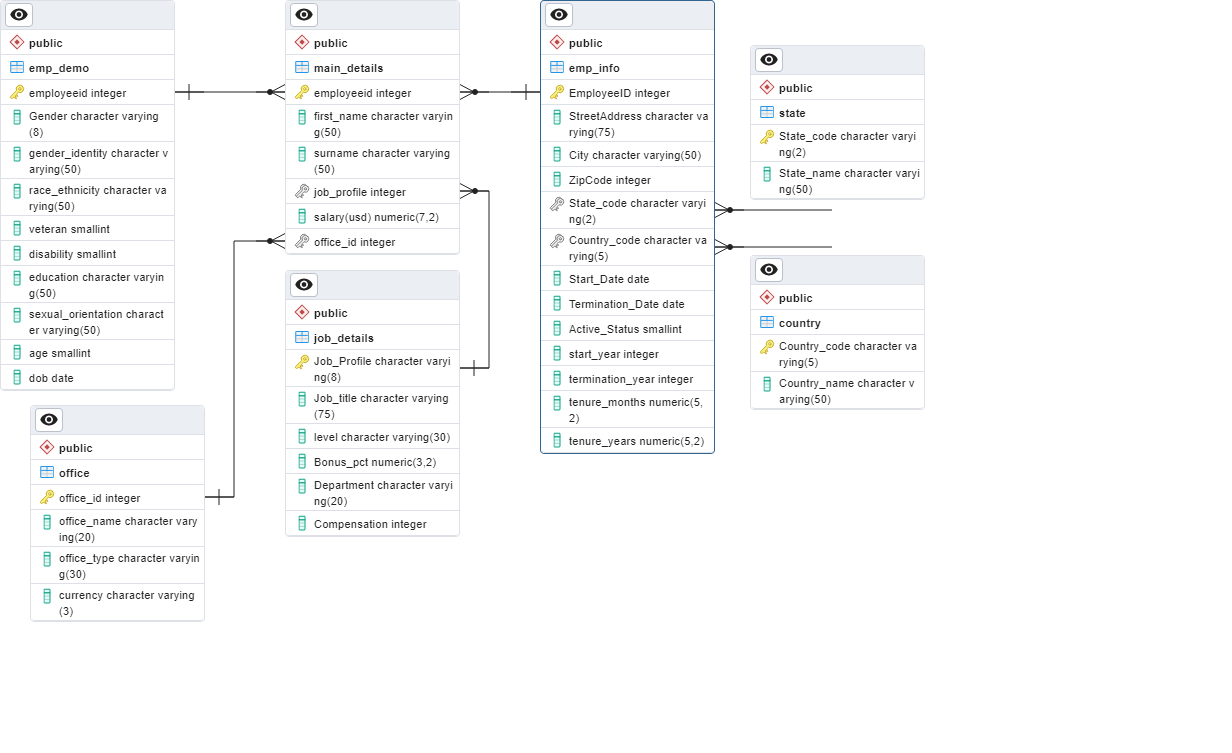

# Tidying tables columns
We are going to remove/replace whitespace, special chars other than `_` so the data can be imported to the database.

### emp_info table

In [33]:
emp_info.head()

,EmployeeID,StreetAddress,City,ZipCode,State_code,Country_code,Start_Date,Termination_Date,Active Status,start_year,termination_year,tenure_months,tenure_years
0,100001,1427 Buckhannan Avenue,North Syracuse,13212,NY,US,2009-05-04,NaN,1,2009,0,172.029324,14.139396
1,100002,4265 Graystone Lakes,Macon,31206,GA,US,2009-05-04,NaN,1,2009,0,172.029324,14.139396
2,100003,1680 Hudson Street,Weehawken,07087,NJ,US,2009-05-18,2013-06-05 00:00:00.000000,0,2009,2013,49.300000,4.052055
3,100004,1262 Limer Street,Rome,30165,GA,US,2009-06-22,2013-10-16 00:00:00.000000,0,2009,2013,52.566667,4.320548
4,100005,2431 Rainbow Road,Santa Ana,92705,CA,US,2009-07-13,2011-01-10 00:00:00.000000,0,2009,2011,18.200000,1.495890


In [34]:
emp_info.columns

Index(['EmployeeID', 'StreetAddress', 'City', 'ZipCode', 'State_code',
       'Country_code', 'Start_Date', 'Termination_Date', 'Active Status',
       'start_year', 'termination_year', 'tenure_months', 'tenure_years'],
      dtype='object')

In [35]:
emp_info.rename(columns={'Active Status':'Active_Status'}, inplace=True)
emp_info.columns

C:\Users\Brian\AppData\Local\Temp/ipykernel_3240/933605737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_info.rename(columns={'Active Status':'Active_Status'}, inplace=True)


Index(['EmployeeID', 'StreetAddress', 'City', 'ZipCode', 'State_code',
       'Country_code', 'Start_Date', 'Termination_Date', 'Active_Status',
       'start_year', 'termination_year', 'tenure_months', 'tenure_years'],
      dtype='object')

### emp_demo table

In [36]:
emp_demo.head()

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation,Age,DOB
0,100001,female,female,White,0,0,Undergraduate,Heterosexual,37.0,1986-01-05
1,100002,male,male,White,0,1,Undergraduate,Heterosexual,52.0,1971-07-13
2,100003,female,female,Asian,0,0,Undergraduate,Heterosexual,34.0,1989-01-25
3,100004,male,male,White,0,0,Undergraduate,Heterosexual,27.0,1996-05-01
4,100005,male,male,Hispanic or Latino,0,0,Undergraduate,Missing,51.0,1972-05-05


In [37]:
emp_demo.rename(columns={'Gender Identity':'Gender_Identity', 'Race/Ethnicity':'Race_Ethnicity', 
                        'Sexual Orientation':'Sexual_Orientation'}, inplace=True)
emp_demo.columns

Index(['EmployeeID', 'Gender', 'Gender_Identity', 'Race_Ethnicity', 'Veteran',
       'Disability', 'Education', 'Sexual_Orientation', 'Age', 'DOB'],
      dtype='object')

In [38]:
emp_demo['Age']=emp_demo['Age'].astype('int')

### job_details table

In [39]:
job_details.head()

,Department,Job_title,level,Bonus_pct,Job_Profile,Compensation
0,Corporate,CEO,CSuite,1.00,JP_1000,500000.0
1,Corporate,HR Manager,Manager,0.20,JP_1001,100000.0
2,Corporate,HR Manager,Individual Contributor,0.20,JP_1002,NaN
3,Corporate,AR Specialist,Individual Contributor,0.15,JP_1003,65000.0
4,Corporate,AP Specialist,Individual Contributor,0.15,JP_1004,65000.0


In [40]:
# re-order columns
cols = list(job_details.columns)
cols[4], cols[0] = cols[0], cols[4]
cols

['Job_Profile',
 'Job_title',
 'level',
 'Bonus_pct',
 'Department',
 'Compensation']

In [41]:
job_details = job_details[cols]
job_details.head()

,Job_Profile,Job_title,level,Bonus_pct,Department,Compensation
0,JP_1000,CEO,CSuite,1.00,Corporate,500000.0
1,JP_1001,HR Manager,Manager,0.20,Corporate,100000.0
2,JP_1002,HR Manager,Individual Contributor,0.20,Corporate,NaN
3,JP_1003,AR Specialist,Individual Contributor,0.15,Corporate,65000.0
4,JP_1004,AP Specialist,Individual Contributor,0.15,Corporate,65000.0


In [42]:
job_details['Compensation'].fillna(0, inplace=True)

In [43]:
job_details['Compensation'] = job_details['Compensation'].astype('int')

In [44]:
job_details.head()

,Job_Profile,Job_title,level,Bonus_pct,Department,Compensation
0,JP_1000,CEO,CSuite,1.00,Corporate,500000
1,JP_1001,HR Manager,Manager,0.20,Corporate,100000
2,JP_1002,HR Manager,Individual Contributor,0.20,Corporate,0
3,JP_1003,AR Specialist,Individual Contributor,0.15,Corporate,65000
4,JP_1004,AP Specialist,Individual Contributor,0.15,Corporate,65000


### office table

In [45]:
company_details.head()

,Office,Currency,Office_Type,Office_id
0,NYC,USD,Corporate,0
1,NYC,USD,Technology,1
2,Boulder,USD,Corporate,2
3,Boulder,USD,Technology,3
4,Oslo,NOK,Technology,4


In [46]:
company_details.rename(columns={'Office':'office_name', 'Office_Type':'office_type', 'Office_id':'office_id'}, inplace=True)
company_details.columns

Index(['office_name', 'Currency', 'office_type', 'office_id'], dtype='object')

In [47]:
# re-order columns
cols = list(company_details.columns)
cols = cols[-1:] + cols[:-1]
office = company_details[cols]
office.head()

,office_id,office_name,Currency,office_type
0,0,NYC,USD,Corporate
1,1,NYC,USD,Technology
2,2,Boulder,USD,Corporate
3,3,Boulder,USD,Technology
4,4,Oslo,NOK,Technology


### state table

In [48]:
statedf.head()

,StateFull,State_code
0,New York,NY
1,Georgia,GA
2,New Jersey,NJ
3,California,CA
4,Montana,MT


In [49]:
statedf.rename(columns={'StateFull':'State_name'}, inplace=True)
statedf = statedf[['State_code', 'State_name']]
statedf.head()

,State_code,State_name
0,NY,New York
1,GA,Georgia
2,NJ,New Jersey
3,CA,California
4,MT,Montana


### country table

In [50]:
country_df.head()

,Country_code,CountryFull
0,US,United States
1,NO,Norway
2,GB,United Kingdom
3,JP,Japan
4,HK,Hong Kong


In [51]:
country_df.rename(columns={'CountryFull':'Country_name'}, inplace=True)
country_df.head()

,Country_code,Country_name
0,US,United States
1,NO,Norway
2,GB,United Kingdom
3,JP,Japan
4,HK,Hong Kong


### main_details table

In [52]:
data.head()

,EmployeeID,First_Name,Surname,Job_Profile,Salary(USD),Office_id
0,100001,Patrice,Moore,JP_1000,500000.0,0
1,100002,David,Rickards,JP_1001,70000.0,0
2,100003,Grace,Maldonado,JP_1027,77000.0,0
3,100004,Justin,Edgin,JP_1041,400000.0,2
4,100005,Benjamin,Vargas,JP_1018,51000.0,0


In [53]:
data.rename(columns={'Office_id':'office_id'}, inplace=True)
data.head()

,EmployeeID,First_Name,Surname,Job_Profile,Salary(USD),office_id
0,100001,Patrice,Moore,JP_1000,500000.0,0
1,100002,David,Rickards,JP_1001,70000.0,0
2,100003,Grace,Maldonado,JP_1027,77000.0,0
3,100004,Justin,Edgin,JP_1041,400000.0,2
4,100005,Benjamin,Vargas,JP_1018,51000.0,0


In [68]:
data['salary(usd)'] = data['salary(usd)'].round(2)
data.head()

,employeeid,first_name,surname,job_profile,salary(usd),office_id
0,100001,Patrice,Moore,JP_1000,500000.0,0
1,100002,David,Rickards,JP_1001,70000.0,0
2,100003,Grace,Maldonado,JP_1027,77000.0,0
3,100004,Justin,Edgin,JP_1041,400000.0,2
4,100005,Benjamin,Vargas,JP_1018,51000.0,0


## Loading data into csv files

In [56]:
emp_info.columns = map(str.lower, emp_info.columns)
emp_demo.columns = map(str.lower, emp_demo.columns)
job_details.columns = map(str.lower, job_details.columns)
office.columns = map(str.lower, office.columns)
statedf.columns = map(str.lower, statedf.columns)
country_df.columns = map(str.lower, country_df.columns)
data.columns = map(str.lower, data.columns)

In [58]:
print("Loading data ...")

emp_info.to_csv('databaseData/emp_info.csv', index=False)
emp_demo.to_csv('databaseData/emp_demo.csv', index=False)
job_details.to_csv('databaseData/job_details.csv', index=False)
office.to_csv('databaseData/office_details.csv', index=False)
country_df.to_csv('databaseData/country_details.csv', index=False)
statedf.to_csv('databaseData/state_details.csv', index=False)
data.to_csv('databaseData/main_details.csv', index=False)

print("Loading data complete")

Loading data ...
Loading data complete
